# extract Media from Ilias

In [1]:
def load(txt):
    with open(txt, "r",encoding = "UTF-8") as source:
        testo = source.readlines()
    return testo
data = load("token_Ilias.txt")

In [2]:
data[0:2]

['μῆνιν|n--s---fa-|μῆνις\n', 'ἄειδε|v-2spma---|ἀείδω\n']

In [18]:
import re
verbs = []
for d in data:
    infos = d.split("|")
    regex = r"(v).*"
    matches = re.match(regex, infos[1])
    if matches is not None:
        verbs.append(infos[2][:-1])

In [20]:
verbs[:2]

['ἀείδω', 'τίθημι']

In [68]:
# Load ilias
with open("HomerGesamt.txt","r",encoding="UTF-8") as il:
    homer = il.read()

In [69]:
import re
regex = r"\n"
homer = re.sub(regex, " ",homer, re.MULTILINE) # delete row break
homer = re.sub("n", "",homer, re.MULTILINE) # delete row break
homer = re.sub(r";","?",homer,re.MULTILINE) # change question mark
homer = re.sub(r"(\d+(\.\d+)?)","",homer,0,re.MULTILINE) # delete verse number


In [74]:
# find sentences:
from nltk import tokenize
homer_sent = tokenize.sent_tokenize(homer)

corpus = [["<START>"] + [w.lower() for w in sent.split()] + ["<END>"] for sent in homer_sent]

In [129]:
with open('stopwords.txt',"r",encoding="UTF-8") as stopw:
    stopwords = stopw.read()
stopwords = stopwords.split('\n')
stopwords.extend('.')
stopwords[-1]

'.'

In [143]:
for sent_ind in range(len(corpus)):
    corpus[sent_ind] = [w for w in corpus[sent_ind] if w not in stopwords]

In [144]:
# find 5 neighbours of erhomai

def allIndices(sent, wanted):
    from more_itertools import locate
    indices = list(locate(sent, lambda a : a == wanted))
    return indices

def find_neighbours(corpus,target_list,window=5):
    context = []
    # iterate per verb_form
    for verb_form in list(target_list):
        # iterate per sentence
        for sentence in corpus:
            # if the wanted form is in the sentence, extract all the indices
            if verb_form in sentence:
                indices = allIndices(sentence,verb_form)
                
                # for each occurrence
                for occurrence in indices:
                    for j in range(max(occurrence-window,0),min(occurrence+window, len(sentence))):
                        if j not in indices:
                            # If the window is large, it makes no sense to count start and end
                            if window > 2:
                                if sentence[j] != "<END>" and sentence[j] != "<START>":
                                    context.append(sentence[j])
    return context
                                
                
    

# Single verbs analysis

In [145]:
import collections
from collections import Counter

In [146]:
# escape
aleinw = set()
aleomai = set()
erukw = set()
for d in data:
    el = d.split('|')
    if el[2] == "ἀλεείνω\n":
        aleinw.add(el[0])
    if el[2] == 'ἀλέομαι\n':
        aleomai.add(el[0])
    if el[2] == 'ἐρύκω\n':
        erukw.add(el[0])

In [147]:
aleinw_c = Counter(find_neighbours(corpus,aleinw))
aleomai_c = Counter(find_neighbours(corpus,aleomai))
erukw_c = Counter(find_neighbours(corpus,erukw))

In [148]:
from pprint import pprint


In [149]:
print(f"Aleinw: {sum(aleinw_c.values())}\naleomai: {sum(aleomai_c.values())}\nerukw: {sum(erukw_c.values())}\n")

Aleinw: 181
aleomai: 346
erukw: 590



In [150]:
pprint(aleinw_c.most_common(100), compact = True)

[('τινα', 4), ('θεοπροπίην', 4), ('ἑτάρων', 4), ('εἰς', 4), ('ἔθνος', 4),
 ('ἐχάζετο', 4), ('κῆρʼ', 4), ('εὐνῇ', 3), ('οὔ', 3), ('ποτʼ', 3),
 ('ἔμικτο,', 3), ('χόλον', 3), ('γυναικός·', 3), ('ἅμʼ', 3), ('αἰθομένας', 3),
 ('δαΐδας', 3), ('τηλεμάχοιο', 3), ('ἐς', 3), ('πατέρʼ', 3), ('ὀφθαλμοῖσιν', 3),
 ('ἰδών,', 3), ('ὑφορβόν.', 3), ('καί', 3), ('τινά', 3), ('πὰρ', 3),
 ('ζηνὸς', 3), ('τάων', 3), ('νῦν', 3), ('λώβην', 3), ('αἴσχεα', 3),
 ('πόλλʼ', 3), ('οὐκ', 3), ('ἐάας', 3), ('νίζειν·', 3), ('ἐμὲ', 3), ('οὐδʼ', 2),
 ('ὀρέων·', 2), ('μεταπαυόμενοι', 2), ('μάχοντο', 2), ('ἀλλήλων', 2),
 ('βέλεα', 2), ('στονόεντα', 2), ('ἔγχεΐ', 2), ('ἄορί', 2), ('μεγάλοισί', 2),
 ('χερμαδίοισιν,', 2), ('αἴαντος', 2), ('μάχην', 2), ('τελαμωνιάδαο.', 2),
 ('φρεσὶ', 2), ('σῇσι', 2), ('δαμῆναι·', 2), ('ῥʼ', 2), ('ἅμα', 2),
 ('ἀργαλέην', 2), ('θωὴν', 2), ('ἀχαιῶν', 2), ('χεῖρα', 2),
 ('παρακρεμάσας·', 2), ('ἐφέλκετο', 2), ('μείλινον', 2), ('πάντοσε', 2),
 ('παπταίνων', 2), ('μή', 2), ('τις', 2), ('φρεσὶν', 2),

In [151]:
pprint(aleomai_c.most_common(100), compact=True)

[('ἄντα', 14), ('ἰδὼν', 14), ('ἀλλʼ', 13), ('χάλκεον', 12), ('ἔγχος·', 9),
 ('κῆρα', 8), ('γὰρ', 8), ('οὐδʼ', 6), ('μέλαιναν.', 6), ('ἔγχος', 6),
 ('ἀνεχάζετο', 4), ('ὀπίσσω', 4), ('μῆνιν', 4), ('ἑκατηβόλου', 4),
 ('ἀπόλλωνος.', 4), ('διάμησε', 4), ('χιτῶνα', 4), ('ἐκλίνθη', 4),
 ('πρόσσω', 4), ('ἂν', 3), ('ἐγὼ', 3), ('διὸς', 3), ('ἔχθος', 3),
 ('πεφιδοίμην', 3), ('οὔτε', 3), ('σεῦ', 3), ('οὔθʼ', 3), ('κεν', 3), ('οὔ', 3),
 ('τις', 3), ('ὑπεκφύγοι', 3), ('μνηστήρων,', 3), ('δῶμα', 3), ('κάτʼ', 3),
 ('ἀντιθέου', 3), ('λαπάρην', 3), ('αὐτὰρ', 3), ('ἔπειτα', 3), ('πουλὺν', 3),
 ('ὅμιλον,', 3), ('ἵνα', 3), ('ἔβαλες', 3), ('ξεῖνον·', 3), ('βέλος', 3),
 ('αὐτός.', 3), ('τυτθόν·', 3), ('δουρὶ', 3), ('φαεινῷ·', 3), ('τυδεΐδης', 2),
 ('τυτθὸν', 2), ('ἐννοσίγαιος', 2), ('οἴχεται', 2), ('εἰς', 2), ('ἅλα', 2),
 ('δῖαν', 2), ('χόλον', 2), ('αἰπὺν', 2), ('ἡμέτερον·', 2), ('μάλα', 2),
 ('πάτροκλος', 2), ('πολλὸν', 2), ('ἀμφοτέρους', 2), ('ἕλε', 2), ('κύκλους', 2),
 ('ἀσπίδος', 2), ('ἀμφιβρότης·', 2),

In [152]:
pprint(erukw_c.most_common(100), compact=True)

[('ἵππους', 13), ('μὴ', 10), ('λαὸν', 9), ('γὰρ', 9), ('οὔ', 9), ('αὐτοῦ', 8),
 ('ἐπὶ', 8), ('τε·', 7), ('τις', 7), ('κατὰ', 6), ('μιν', 6), ('ἦ', 6),
 ('δῖα', 6), ('κʼ', 5), ('φώνησέν', 5), ('ἐν', 5), ('πρῶτον', 5), ('μʼ', 5),
 ('οὐδʼ', 4), ('μή', 4), ('εὖ', 4), ('κόσμον', 4), ('αὖθʼ', 4), ('τάφρῳ,', 4),
 ('αὐτοὶ', 4), ('σὺ', 4), ('αὐτὰρ', 4), ('ἐγὼ', 4), ('περ·', 4), ('ὠκέας', 4),
 ('κακόν,', 4), ('ἱεμένων', 4), ('περ.', 4), ('ἕκαστος', 3), ('πρὸ', 3),
 ('φάος', 3), ('ἠελίοιο,', 3), ('ὀδυσσεὺς', 3), ('αὐτὸς', 3), ('“παύεσθον', 3),
 ('κλαυθμοῖο', 3), ('μένοις·', 3), ('ἀέκοντα', 3), ('σʼ', 3), ('φαιήκων·', 3),
 ('τοῦτο', 3), ('φίλον', 3), ('ἑήνδανε·', 3), ('βούλετο', 3), ('γάρ', 3),
 ('ῥα', 3), ('ῥέξαι', 3), ('θʼ', 3), ('ἱερὰς', 3), ('ἑκατόμβας,', 3),
 ('ἐθέλῃς', 3), ('σὸν', 3), ('θυμὸν', 3), ('ἑταίρων,', 3), ('ὁππότε', 3),
 ('κε', 3), ('οἴνοιό', 3), ('πινομένοιο', 3), ('σίτου·', 3), ('χαλεπὸν', 3),
 ('ἕνα', 3), ('πολλούς.', 3), ('κεχρημένον', 3), ('ἠδὲ', 3), ('γυναικὸς', 3),
 ('νύμφη'

In [153]:
def extract_neighbours(verb, corpus = corpus,window=5,print_common = True,hmany=100):
    verb_forms = set()
    for d in data:
        el = d.split('|')
        if el[2] == verb+"\n":
            verb_forms.add(el[0])
    context = Counter(find_neighbours(corpus,verb_forms,window = window))
    if print_common:
        pprint(context.most_common(hmany), compact=True)
    return context        

In [141]:
euhomai = extract_neighbours("εὔχομαι")

[('εἶναι.', 22), ('εἶναι', 21), ('γένος', 20), ('διὶ', 19), ('ἐξ', 14),
 ('εἶναι,', 14), ('ὣς', 12), ('ποσειδάωνι', 12), ('χεῖρας', 12),
 ('ἀνασχών·', 10), ('ἔπειτα', 10), ('ἀλλʼ', 10), ('ἐγὼ', 10), ('γʼ', 9),
 ('γε', 9), ('εἶναι·', 9), ('εἶναι.”', 9), ('μέν', 8), ('κούρῃ', 8),
 ('ἄνακτι', 8), ('ἀχαιῶν', 8), ('ὃς', 8), ('υἱὸς', 8), ('διὸς', 7), ('εἰς', 7),
 ('σύ', 7), ('πατρὶ', 7), ('μέλλεις', 7), ('“κλῦθι,', 6), ('μέγα', 6),
 ('αὐτίκα', 6), ('πολλὰ', 6), ('“ὣς', 6), ('ἐπεὶ', 6), ('μάλα', 6),
 ('πατὴρ', 6), ('ἐμὸς', 6), ('μετὰ', 6), ('ἀγχιάλοιο', 6), ('δαΐφρονος', 6),
 ('υἱός,', 6), ('ἀτὰρ', 6), ('ταφίοισι', 6), ('γὰρ', 6), ('οὐ', 6),
 ('ἱκέτης', 6), ('κρητάων', 6), ('εὐρειάων,', 6), ('ποῦ', 6), ('νύ', 6),
 ('ῥʼ', 5), ('ἄνακτι·', 5), ('ὃν', 5), ('κατὰ', 5), ('χεῖρʼ', 5), ('ὀρέγων', 5),
 ('οὐρανὸν', 5), ('πᾶσι', 5), ('θεοῖσι', 5), ('τεληέσσας', 5), ('ἑκατόμβας', 5),
 ('ἐμὲ', 5), ('οἴκαδʼ', 5), ('δὴ', 5), ('πατρί,', 5), ('ἐκ', 5), ('μεγάλου', 5),
 ('γεραίτερος', 5), ('ἀγαθοῦ', 5), ('μέντ

## Analyzer

In [169]:
ilias_dict = {}
for d in data:
    el = d.split('|')
    if el[0] in ilias_dict.keys():
        continue
    else:
        ilias_dict[el[0]] = el[1]

In [302]:
class Analyzer():
    
    def __init__(self,verb):
        self.verb = verb
        self.pos = []
        self.tense = []
        self.voice = []
        self.case = []
        self.mood = []
        self.context = None
        self.context_words = 0
        
    def __repr__(self):
        print(f"Analyzer für das Verb {self.verb}")
        
    def extract_context(self):
        self.context = extract_neighbours(self.verb,print_common=False)
    
    def analyze(self):
        if self.context == None:
            self.extract_context()
        self.context_words = sum(self.context.values())
        for w in list(self.context):
            if w in ilias_dict.keys() and len(ilias_dict[w]) > 8 :
                morpho_info = ilias_dict[w]
                self.pos.append(morpho_info[0])
                if morpho_info[4] != "-":
                    self.tense.append(morpho_info[4])
                if morpho_info[5] != "-":
                    self.mood.append(morpho_info[5])
                if morpho_info[6] != "-":
                    self.voice.append(morpho_info[6])
                if morpho_info[8] != "-":
                    self.case.append(morpho_info[8])
        
    def get_info(self,category,pr = False):
        cat_c = Counter(category)
        cat_c_normalized = {}
        for w,c in cat_c.items():
            cat_c_normalized[w] = round(c/self.context_words,3)
            if pr:
                print(f"{w} : {cat_c_normalized[w]}")
        return cat_c_normalized
            
    def get_pos(self,pr=False):
        return self.get_info(self.pos,pr)
        
    def get_tense(self,pr=False):
        return self.get_info(self.tense,pr)
        
    def get_mood(self,pr=False):
        return self.get_info(self.mood,pr)
    
    def get_voice(self,pr=False):
        return self.get_info(self.voice,pr)
    
    def get_case(self,pr=False):
        return self.get_info(self.case,pr)
    
    def get_all(self,pr=True):
        print("POS:\n")
        self.get_pos(pr=pr)
        print("\nTENSE\n")
        self.get_tense(pr=pr)
        print("\nVOICE\n")
        self.get_voice(pr=pr)
        print("\nMOOD\n")
        self.get_mood(pr=pr)
        print("\nCASE\n")
        self.get_case(pr=pr)
        
        


        
        
        

In [303]:
del(euhomai)

In [306]:
euhomai = Analyzer("εὔχομαι")
euhomai.analyze()
euhomai.get_all(pr=True)

POS:

n : 0.038
v : 0.027
c : 0.008
d : 0.021
g : 0.009
p : 0.01
a : 0.03
r : 0.003

TENSE

p : 0.008
i : 0.002
a : 0.016
r : 0.001

VOICE

e : 0.001
a : 0.024
m : 0.003

MOOD

p : 0.007
i : 0.012
m : 0.005
n : 0.003
s : 0.001

CASE

g : 0.019
n : 0.024
d : 0.017
a : 0.025
v : 0.001


In [285]:
ainumai = Analyzer('αἱρέω')
ainumai.analyze()
ainumai.get_all()

POS:

Counter({'n': 254,
         'a': 184,
         'v': 158,
         'd': 61,
         'c': 25,
         'p': 20,
         'g': 19,
         'r': 19})
v : 0.031
g : 0.004
p : 0.004
n : 0.049
d : 0.012
c : 0.005
a : 0.036
r : 0.004

TENSE

Counter({'a': 94, 'i': 31, 'p': 20, 'f': 8, 'r': 4, 'l': 1})
a : 0.018
p : 0.004
f : 0.002
r : 0.001
i : 0.006
l : 0.0

VOICE

Counter({'a': 109, 'm': 29, 'e': 17, 'p': 3})
a : 0.021
m : 0.006
e : 0.003
p : 0.001

MOOD

Counter({'i': 93, 'p': 45, 's': 8, 'n': 7, 'o': 3, 'm': 2})
m : 0.0
n : 0.001
i : 0.018
p : 0.009
s : 0.002
o : 0.001

CASE

Counter({'a': 231, 'n': 126, 'g': 72, 'd': 69, 'v': 5})
d : 0.013
a : 0.045
g : 0.014
n : 0.024
v : 0.001


In [292]:
mahomai = Analyzer('μάχομαι')
mahomai.analyze()

In [291]:
erizw = Analyzer("ἐρίζω")
erizw.analyze()

# Visualisierung

In [314]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

Counter({'a': 94, 'i': 31, 'p': 20, 'f': 8, 'r': 4, 'l': 1})
a : 0.018
p : 0.004
f : 0.002
r : 0.001
i : 0.006
l : 0.0
Counter({'a': 94, 'i': 31, 'p': 20, 'f': 8, 'r': 4, 'l': 1})
a : 0.018
p : 0.004
f : 0.002
r : 0.001
i : 0.006
l : 0.0
Counter({'p': 4, 'a': 3, 'r': 1})
a : 0.012
p : 0.016
r : 0.004
Counter({'p': 4, 'a': 3, 'r': 1})
a : 0.012
p : 0.016
r : 0.004
Counter({'p': 30, 'a': 23, 'r': 8, 'i': 7, 'f': 4, 'l': 1})
p : 0.018
a : 0.014
i : 0.004
r : 0.005
l : 0.001
f : 0.002
Counter({'p': 30, 'a': 23, 'r': 8, 'i': 7, 'f': 4, 'l': 1})
p : 0.018
a : 0.014
i : 0.004
r : 0.005
l : 0.001
f : 0.002


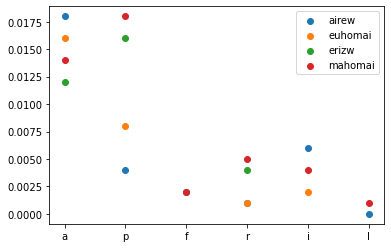

In [320]:
plt.close()
plt.scatter(ainumai.get_tense().keys(), ainumai.get_tense().values(), label= "airew")
plt.scatter(euhomai.get_tense().keys(), euhomai.get_tense().values(),label="euhomai")
plt.scatter(erizw.get_tense().keys(), erizw.get_tense().values(),label="erizw")
plt.scatter(mahomai.get_tense().keys(), mahomai.get_tense().values(),label="mahomai")
plt.legend()

In [318]:
plt.close()